In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sb

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

In [2]:
df_path = "Call-Center.csv"
df = pd.read_csv(df_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Call Id              5000 non-null   object 
 1   Date                 5000 non-null   object 
 2   Agent                5000 non-null   object 
 3   Department           5000 non-null   object 
 4   Answered (Y/N)       5000 non-null   object 
 5   Resolved             5000 non-null   object 
 6   Speed of Answer      4054 non-null   float64
 7   AvgTalkDuration      4054 non-null   object 
 8   Satisfaction rating  4054 non-null   float64
 9   Unnamed: 9           0 non-null      float64
 10  Unnamed: 10          0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 429.8+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [4]:
print(df['Date'].head())

0   2015-01-01 09:12:00
1   2015-01-01 09:12:00
2   2015-01-01 09:47:00
3   2015-01-01 09:47:00
4   2015-01-01 10:00:00
Name: Date, dtype: datetime64[ns]


<Axes: title={'center': 'Call Volumn by Hour'}, xlabel='Hour', ylabel='Day'>

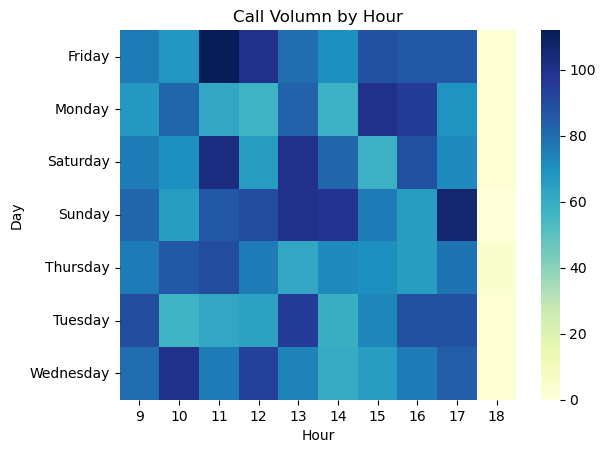

In [5]:
df = df.copy()

df.loc[:, 'Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.loc[:, 'Hour'] = df['Date'].dt.hour
df.loc[:, 'Day'] = df['Date'].dt.day_name()

df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day_name()

heat_data = df.groupby(['Day', 'Hour']).size().unstack().fillna(0)
plt.title("Call Volumn by Hour")
sb.heatmap(heat_data, cmap='YlGnBu')

<Axes: title={'center': 'Average Call Duration'}, xlabel='Hour', ylabel='Day'>

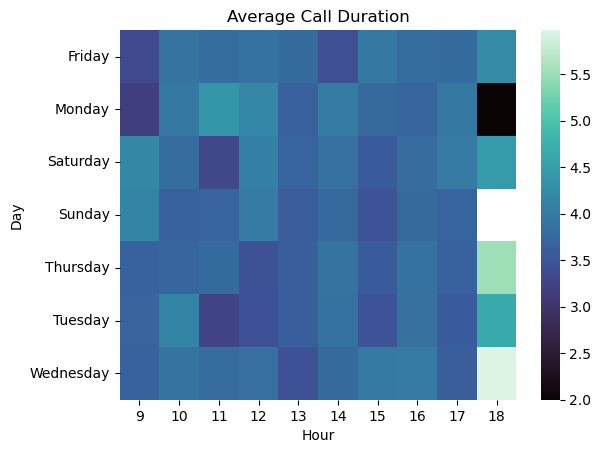

In [6]:
df['AvgTalkDuration'] = pd.to_timedelta(df['AvgTalkDuration'])

df['AvgTalkDurationMinutes'] = df['AvgTalkDuration'].dt.total_seconds() / 60

df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day_name()

heat_data = df.groupby(['Day', 'Hour'])['AvgTalkDurationMinutes'].mean().unstack()
plt.title("Average Call Duration")
sb.heatmap(heat_data, cmap='mako')

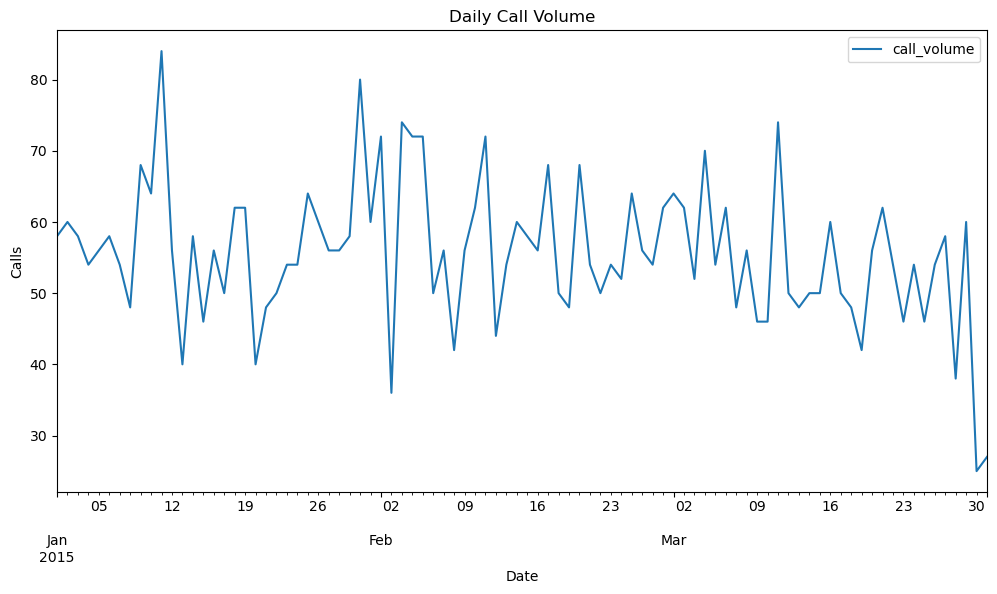

In [7]:
df['Date'] = pd.to_datetime(df['Date']) 

daily_calls = df.groupby(df['Date'].dt.date).size().reset_index(name='call_volume')
daily_calls['Date'] = pd.to_datetime(daily_calls['Date'])
daily_calls.set_index('Date', inplace=True)

daily_calls['call_volume'].plot(figsize=(12, 6), title='Daily Call Volume')
plt.xlabel('Date')
plt.ylabel('Calls')
plt.legend()
plt.show()

16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1] done processing


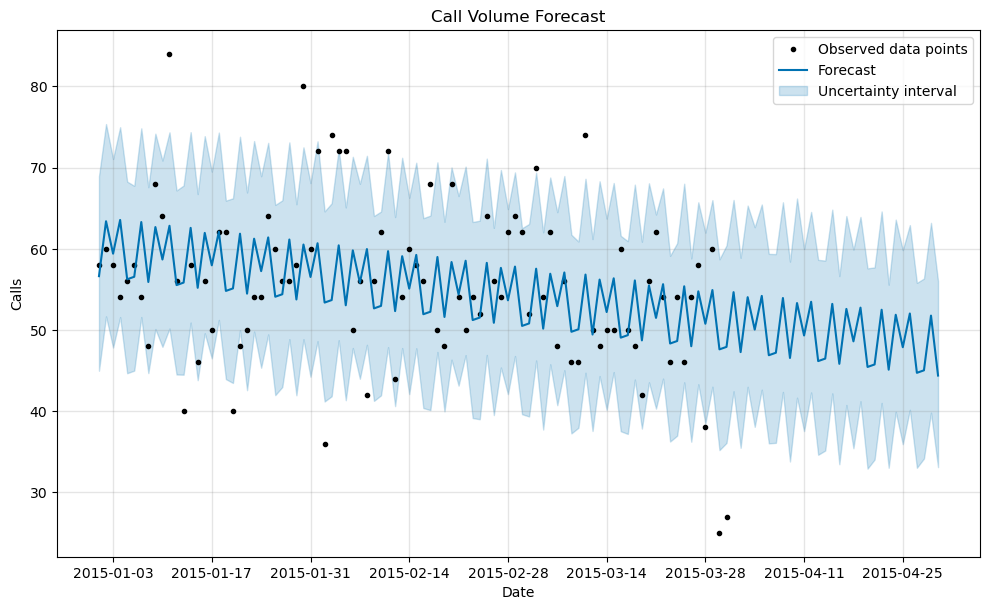

In [8]:
call_data = daily_calls.reset_index().rename(columns={'Date': 'ds', 'call_volume': 'y'})

model = Prophet()
model.fit(call_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Call Volume Forecast")
plt.xlabel("Date")
plt.ylabel("Calls")
plt.legend()
plt.show()

C:\Users\bowli\AppData\Local\Temp\ipykernel_14568\4064239969.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


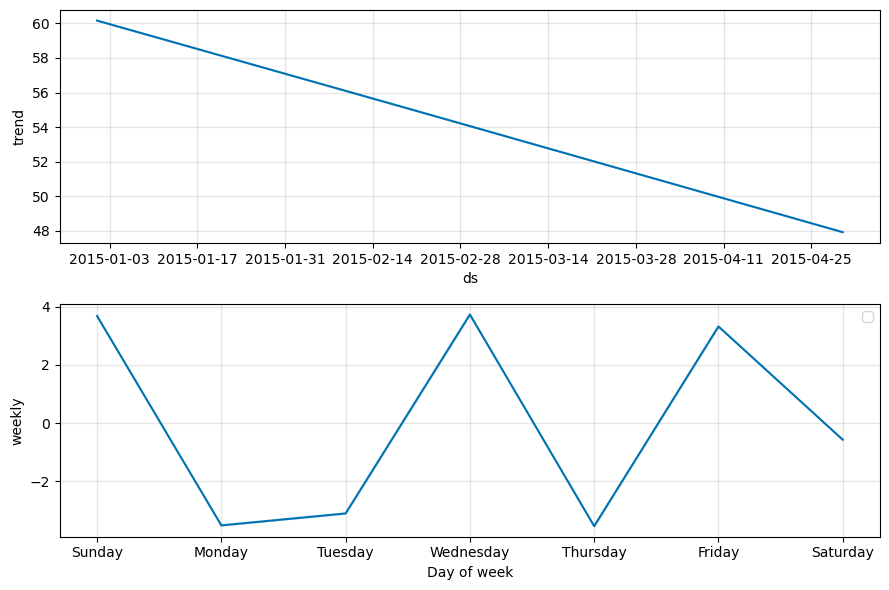

In [9]:
model.plot_components(forecast)
plt.legend()
plt.show()

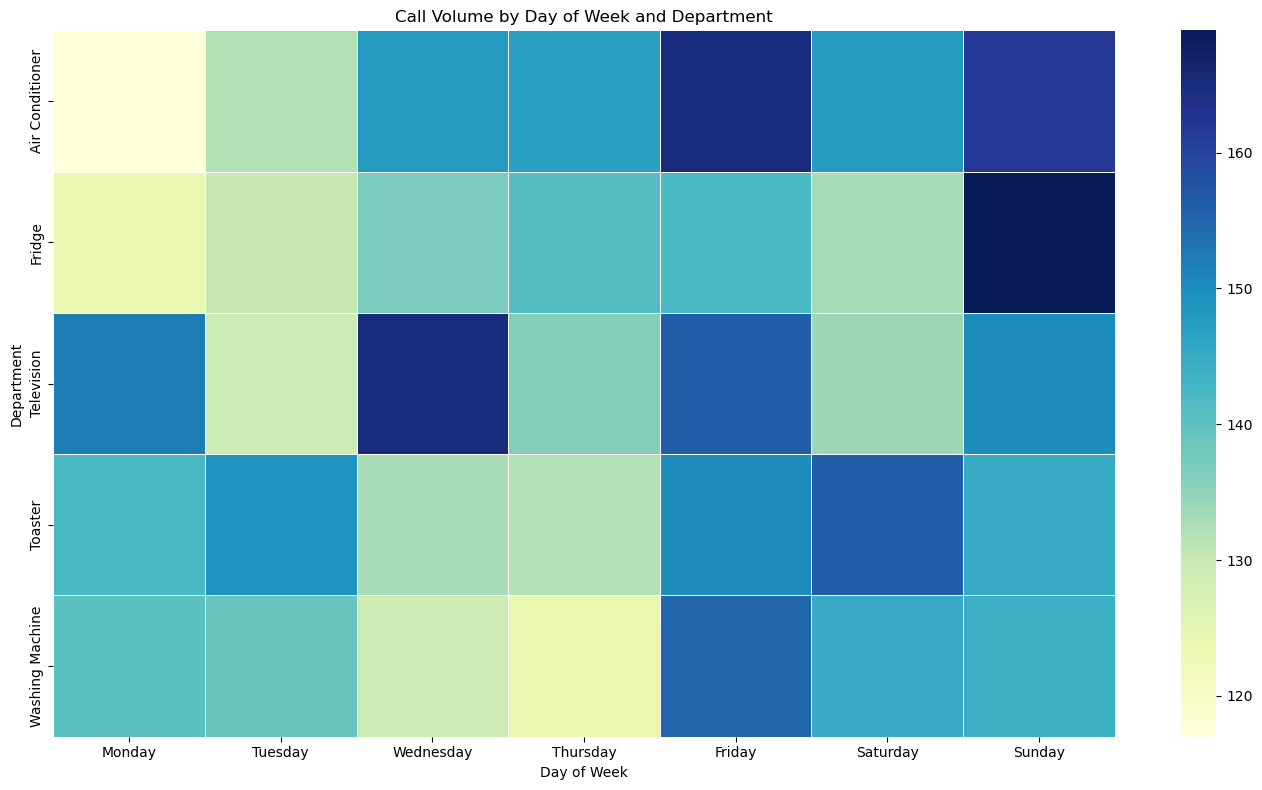

In [10]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Day of Week"] = df["Date"].dt.day_name()

heatmap_data = df.groupby(["Day of Week", "Department"]).size().unstack(fill_value=0)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14, 8))
sb.heatmap(heatmap_data.T, cmap="YlGnBu", linewidths=0.5)
plt.title("Call Volume by Day of Week and Department")
plt.xlabel("Day of Week")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

In [11]:
cutoff_date = pd.to_datetime('01/03/2015 00:00:00', dayfirst=True)
df_filtered = df[df['Date'] > cutoff_date].copy()


<Axes: title={'center': 'Daily Call Volume'}, xlabel='Date'>

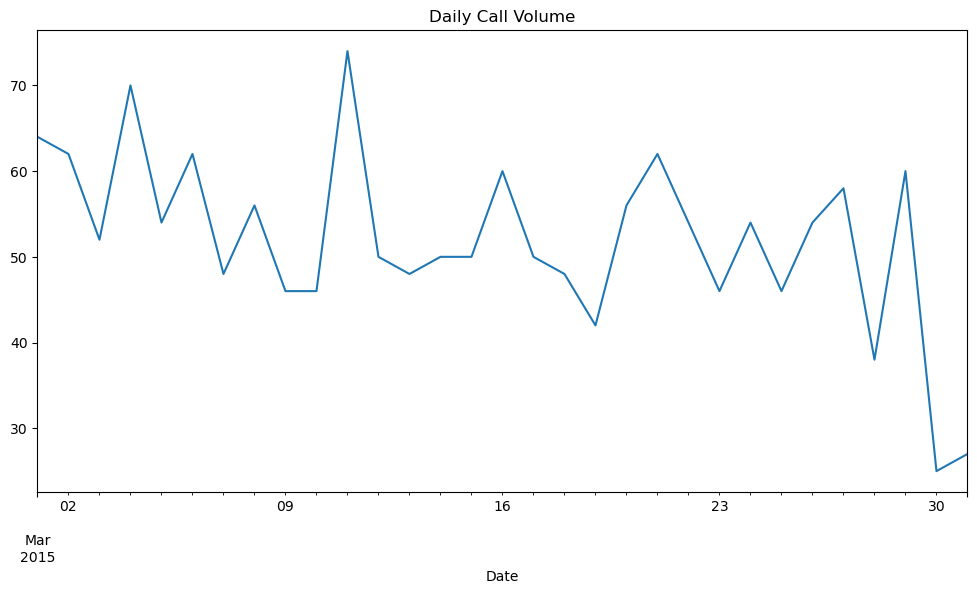

In [12]:
daily_calls1 = df_filtered.groupby(df_filtered['Date'].dt.date).size().reset_index(name='call_volume')
daily_calls1['Date'] = pd.to_datetime(daily_calls1['Date'])
daily_calls1.set_index('Date', inplace=True)
daily_calls1['call_volume'].plot(figsize=(12, 6), title='Daily Call Volume')

16:00:23 - cmdstanpy - INFO - Chain [1] start processing
16:00:23 - cmdstanpy - INFO - Chain [1] done processing


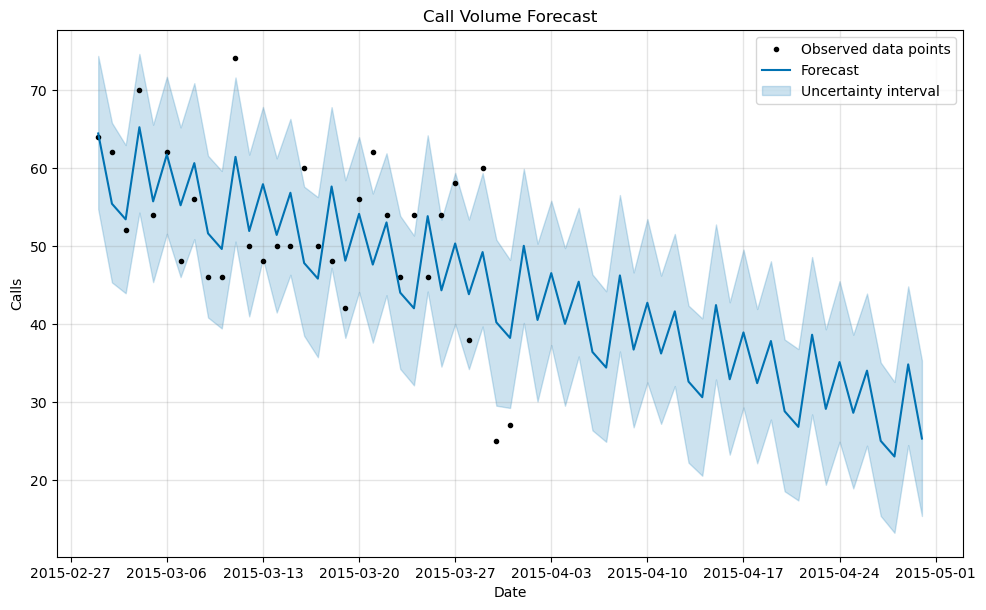

In [13]:
call_data = daily_calls1.reset_index().rename(columns={'Date': 'ds', 'call_volume': 'y'})

model = Prophet()
model.fit(call_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Call Volume Forecast")
plt.xlabel("Date")
plt.ylabel("Calls")
plt.legend()
plt.show()

C:\Users\bowli\AppData\Local\Temp\ipykernel_14568\4064239969.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


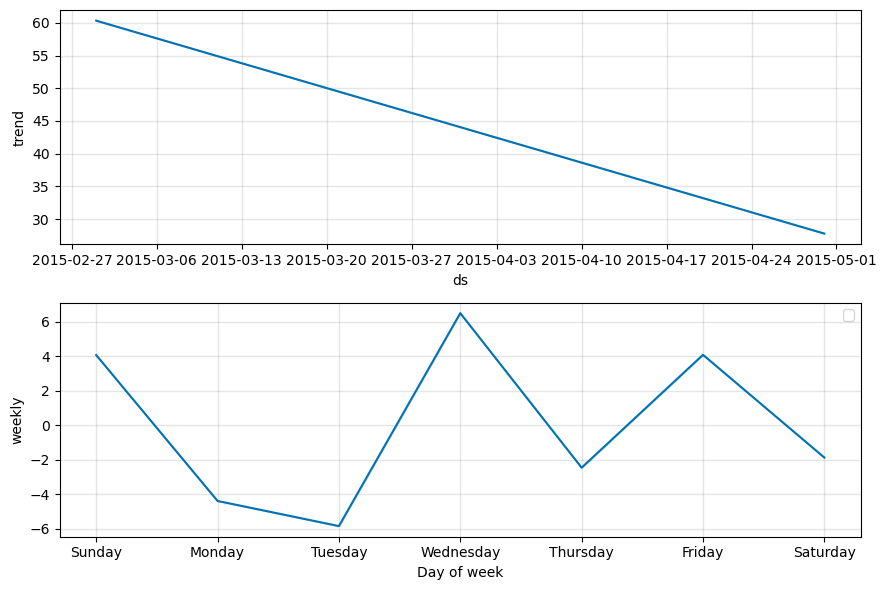

In [14]:
model.plot_components(forecast)
plt.legend()
plt.show()

In [15]:
daily_calls2 = df.groupby(df['Date'].dt.date).size().reset_index(name='call_volume')
daily_calls2.columns = ['Date', 'call_volume']  # Rename both columns
daily_calls2['Date'] = pd.to_datetime(daily_calls2['Date'])
daily_calls2.set_index('Date', inplace=True)

In [16]:
y = daily_calls2['call_volume']
y_train = y[:45]  
y_test = y[45:]  
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [17]:
forecaster = NaiveForecaster(strategy="mean")  
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

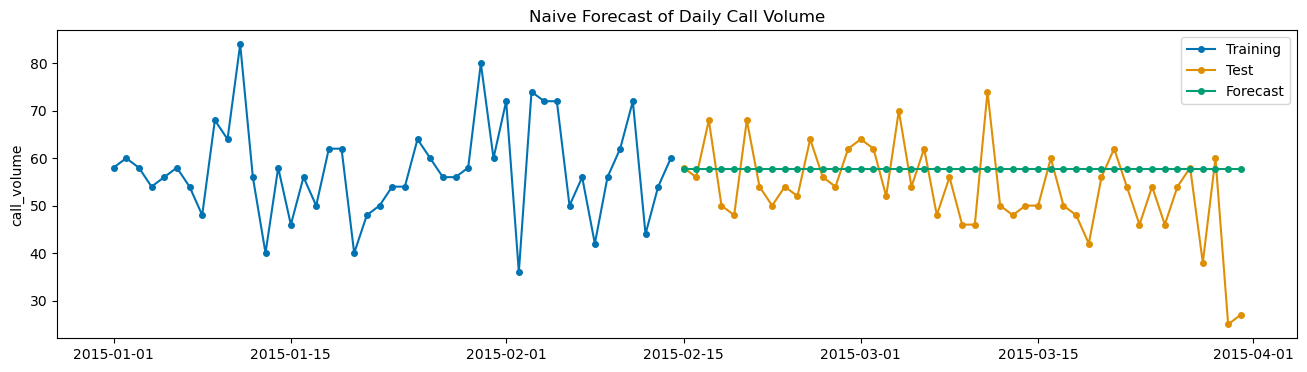

In [18]:
# Plot
plot_series(y_train, y_test, y_pred, labels=["Training", "Test", "Forecast"])
plt.title("Naive Forecast of Daily Call Volume")
plt.show()

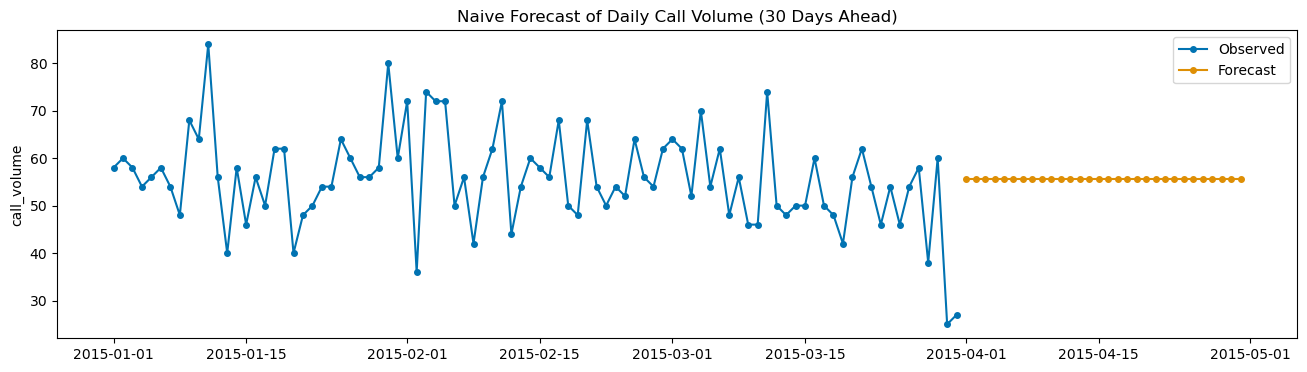

In [19]:
# forecast the future
last_date = y.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
fh = ForecastingHorizon(future_dates, is_relative=False)

# train
forecaster = NaiveForecaster(strategy="mean")
forecaster.fit(y)
y_pred = forecaster.predict(fh)

# plot
plot_series(y, y_pred, labels=["Observed", "Forecast"])
plt.title("Naive Forecast of Daily Call Volume (30 Days Ahead)")
plt.show()